# Costa Rica Poverty Prediction

In [233]:
# %pip install 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exploratory analysis

In [235]:
df = pd.read_csv('train.csv')
df

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,NaN,0,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,NaN,0,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,NaN,0,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


In [236]:
# get dependency column from sq dependency
# print(sorted(df['dependency'].unique()))
# df['dependency'].value_counts()
# df['SQBdependency'].value_counts()
df['dependency'] = [np.sqrt(x) for x in df['SQBdependency']]

# clean out strings from numeric education
for col in ['edjefe','edjefa']:
    df.loc[df[col]=='yes',col] = np.nan
    df.loc[df[col]=='no',col] = 0
    df[col] = [float(x) for x in df[col]]

# look at unique values
cols = df.columns[73:].tolist()
for col in cols:
    vals = sorted(df[col].unique())[:5]
    vals.append(vals[-1])
    print(f"{col}: {set(vals)}")

dis: {0, 1}
male: {0, 1}
female: {0, 1}
estadocivil1: {0, 1}
estadocivil2: {0, 1}
estadocivil3: {0, 1}
estadocivil4: {0, 1}
estadocivil5: {0, 1}
estadocivil6: {0, 1}
estadocivil7: {0, 1}
parentesco1: {0, 1}
parentesco2: {0, 1}
parentesco3: {0, 1}
parentesco4: {0, 1}
parentesco5: {0, 1}
parentesco6: {0, 1}
parentesco7: {0, 1}
parentesco8: {0, 1}
parentesco9: {0, 1}
parentesco10: {0, 1}
parentesco11: {0, 1}
parentesco12: {0, 1}
idhogar: {'004616164', '003123ec2', '005905417', '001ff74ca', '004983866'}
hogar_nin: {0, 1, 2, 3, 4}
hogar_adul: {0, 1, 2, 3, 4}
hogar_mayor: {0, 1, 2, 3}
hogar_total: {1, 2, 3, 4, 5}
dependency: {0.0, 0.16666667333333318, 0.2222222221111109, 0.20000000749999985, 0.25}
edjefe: {0.0, 2.0, 3.0, 4.0, 5.0}
edjefa: {0.0, 2.0, 3.0, 4.0, 5.0}
meaneduc: {0.0, 1.5, 2.3333333, 2.6666667, 3.3333333}
instlevel1: {0, 1}
instlevel2: {0, 1}
instlevel3: {0, 1}
instlevel4: {0, 1}
instlevel5: {0, 1}
instlevel6: {0, 1}
instlevel7: {0, 1}
instlevel8: {0, 1}
instlevel9: {0, 1}
bedroo

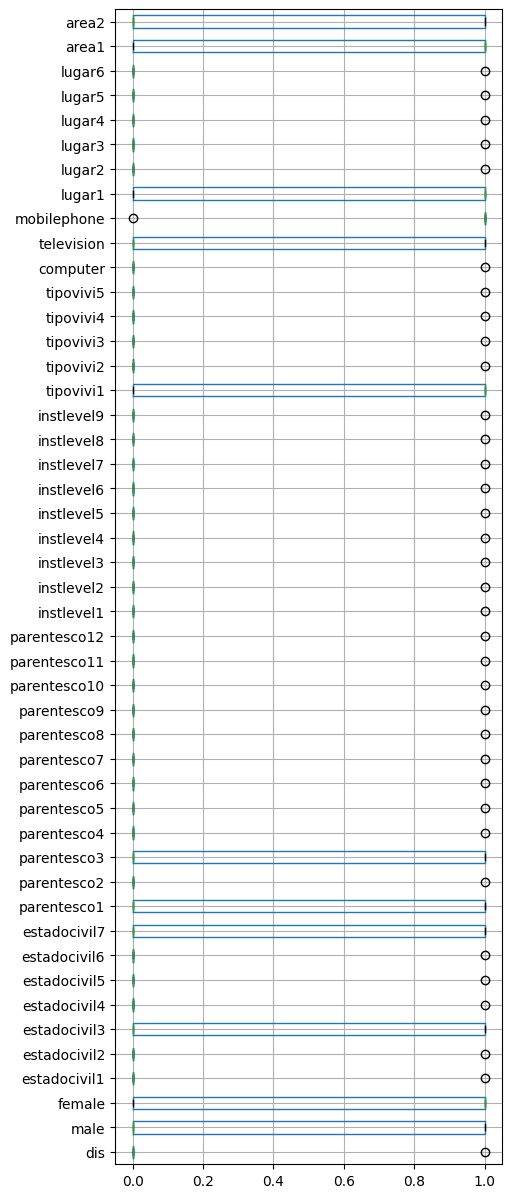

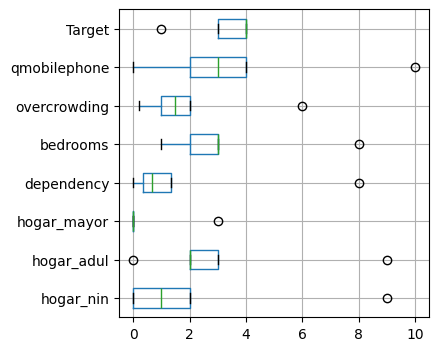

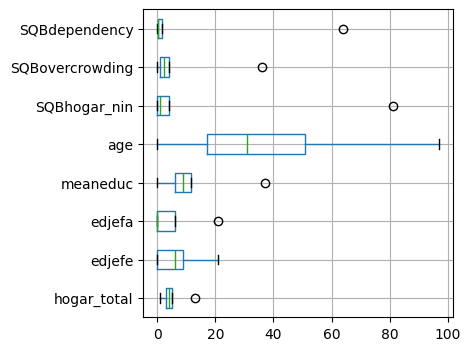

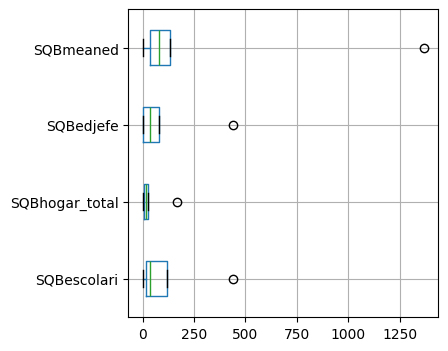

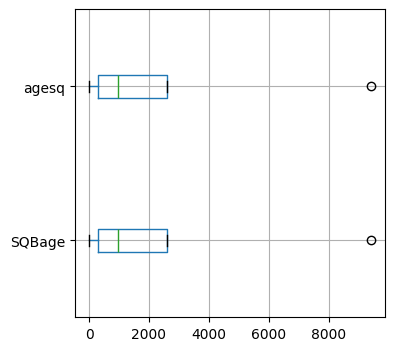

In [237]:
df2 = df.iloc[:,73:]
df2 = df2[[x for x in df2.columns if not isinstance(df2.loc[0,x],str)]]
for m in [1,10,100,5000,10000]:
    if m==1:
        fsize=(5,15)
    else:
        fsize=(4,4)
    plt.figure(figsize=fsize)
    summary = df2[[x for x in df2.columns if max(df2[x])<=m]].describe()
    df2 = df2[[x for x in df2.columns if max(df2[x])>m]]
    summary = summary.T[['min','25%','50%','75%','max']].T
    summary.boxplot(vert=False)
    plt.show()

In [238]:
# calculate percentages
for col in df[cols].columns:
    print(df[col].value_counts(normalize=True).reset_index()[:5])

   dis  proportion
0    0    0.942451
1    1    0.057549
   male  proportion
0     0    0.516585
1     1    0.483415
   female  proportion
0       1    0.516585
1       0    0.483415
   estadocivil1  proportion
0             0    0.862195
1             1    0.137805
   estadocivil2  proportion
0             0     0.87674
1             1     0.12326
   estadocivil3  proportion
0             0     0.73161
1             1     0.26839
   estadocivil4  proportion
0             0    0.968086
1             1    0.031914
   estadocivil5  proportion
0             0    0.937219
1             1    0.062781
   estadocivil6  proportion
0             0    0.966831
1             1    0.033169
   estadocivil7  proportion
0             0    0.657319
1             1    0.342681
   parentesco1  proportion
0            0    0.688919
1            1    0.311081
   parentesco2  proportion
0            0    0.815946
1            1    0.184054
   parentesco3  proportion
0            0    0.618186
1            

In [239]:
# calculate missing
for col in df[cols].columns:
    n = sum(df[col].isnull())
    if n>0:
        print(f"{col}: {n} {round(n/len(df),3)}")

edjefe: 123 0.013
edjefa: 69 0.007
meaneduc: 5 0.001
SQBmeaned: 5 0.001


In [240]:
df.to_csv('cleaned.csv',index=None)

## Preprocessing

Import data with feature selection already applied

In [3]:
import pandas as pd
pd.read_csv('train.csv').shape

(9557, 143)

In [4]:
df = pd.read_csv('final_data',index_col=0)
df = df.drop(columns=[x for x in df.columns if 'Sq' in x])

print(df.select_dtypes('object'))
df = df.drop(columns=['idhogar']) # drop string ID

len(df.columns)

                idhogar
Id                     
ID_279628684  21eb7fcc1
ID_f29eb3ddd  0e5d7a658
ID_68de51c94  2c7317ea8
ID_ec05b1a7b  2b58d945f
ID_1284f8aad  d6dae86b7
...                 ...
ID_18b0a845b  9bbf7c6ca
ID_a31274054  e87e70c06
ID_32a00a8bf  a8eeafc29
ID_79d39dddc  212db6f6c
ID_d45ae367d  d6c086aa3

[2973 rows x 1 columns]


126

Feature selection

In [5]:
from sklearn.feature_selection import VarianceThreshold

threshold = 0.2
sel = VarianceThreshold(threshold)
sel.fit_transform(df)
selected_features = sel.get_feature_names_out(df.columns)
df = df[selected_features]
len(selected_features)

52

Impute missing values (needed for NN)

In [6]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
df = pd.DataFrame(imputer.fit_transform(df), columns=imputer.get_feature_names_out())

In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = .3)
valid, test = train_test_split(test, test_size = .1)

Train test split

In [9]:
X_train = train.drop(columns='Target')
y_train = train['Target']
X_valid = valid.drop(columns='Target')
y_valid = valid['Target']
X_test = test.drop(columns='Target')
y_test = test['Target']

In [10]:
# desample = train.loc[train['Target']==4].sample(frac=.5).index
# train = train.drop(desample)
# X_train = train.drop(columns='Target')
# y_train = train['Target']

## Tuning: NN Classifier

In [17]:
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.metrics import roc_auc_score

Recommended to scale data

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)  

In [13]:
help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network._multilayer_perceptron:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'id

In [18]:
alphas = np.power(10.0,np.arange(-10,0,.5))
train_scores = []
valid_scores = []

for alpha in alphas:
    mlp = MLPClassifier(solver='sgd',alpha=alpha)
    mlp.fit(X_train,y_train)

    train_scores.append(roc_auc_score(y_train, mlp.predict_proba(X_train), multi_class = "ovr", average = "micro"))
    valid_scores.append(roc_auc_score(y_valid, mlp.predict_proba(X_valid), multi_class = "ovr", average = "micro"))

fig,ax = plt.subplots()
ax.plot(alphas,train_scores,label='Train')
ax.plot(alphas,valid_scores,label='Validate')
ax.legend()
alpha = max(zip(alphas,valid_scores),key=lambda x: x[1])[0]
print(alpha)

c:\Users\kyi\OneDrive - American Institutes for Research in the Behavioral Sciences\Documents\GitHub\ml-project\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kyi\OneDrive - American Institutes for Research in the Behavioral Sciences\Documents\GitHub\ml-project\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kyi\OneDrive - American Institutes for Research in the Behavioral Sciences\Documents\GitHub\ml-project\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kyi\OneDrive - A

NameError: name 'plt' is not defined

c:\Users\kyi\OneDrive - American Institutes for Research in the Behavioral Sciences\Documents\GitHub\ml-project\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kyi\OneDrive - American Institutes for Research in the Behavioral Sciences\Documents\GitHub\ml-project\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kyi\OneDrive - American Institutes for Research in the Behavioral Sciences\Documents\GitHub\ml-project\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kyi\OneDrive - A

405

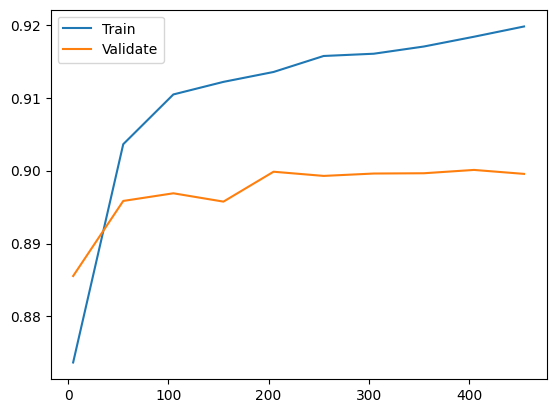

In [64]:
sizes = np.arange(5,500,50)
train_scores = []
valid_scores = []

for size in sizes:
    mlp = MLPClassifier(solver='sgd',hidden_layer_sizes=(size,))
    mlp.fit(X_train,y_train)

    train_scores.append(roc_auc_score(y_train, mlp.predict_proba(X_train), multi_class = "ovr", average = "micro"))
    valid_scores.append(roc_auc_score(y_valid, mlp.predict_proba(X_valid), multi_class = "ovr", average = "micro"))

fig,ax = plt.subplots()
ax.plot(sizes,train_scores,label='Train')
ax.plot(sizes,valid_scores,label='Validate')
ax.legend()
size = max(zip(sizes,valid_scores),key=lambda x: x[1])[0]
size

c:\Users\kyi\OneDrive - American Institutes for Research in the Behavioral Sciences\Documents\GitHub\ml-project\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kyi\OneDrive - American Institutes for Research in the Behavioral Sciences\Documents\GitHub\ml-project\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kyi\OneDrive - American Institutes for Research in the Behavioral Sciences\Documents\GitHub\ml-project\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kyi\OneDrive - A

(2, 0.8986272888021011)


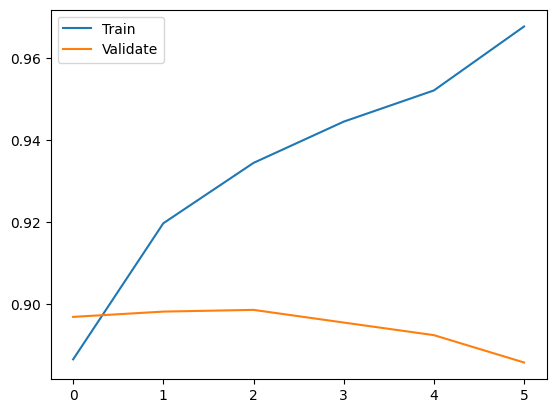

In [66]:
layers = np.round(np.power(2.,np.arange(0,-6,-1)) * size)
layers = [int(x) for x in layers]
train_scores = []
valid_scores = []

for i in range(len(layers)):
    mlp = MLPClassifier(solver='sgd',hidden_layer_sizes=tuple(layers[:i]))
    mlp.fit(X_train,y_train)

    train_scores.append(roc_auc_score(y_train, mlp.predict_proba(X_train), multi_class = "ovr", average = "micro"))
    valid_scores.append(roc_auc_score(y_valid, mlp.predict_proba(X_valid), multi_class = "ovr", average = "micro"))

fig,ax = plt.subplots()
ax.plot(np.arange(len(layers)),train_scores,label='Train')
ax.plot(np.arange(len(layers)),valid_scores,label='Validate')
ax.legend()
layers = max(zip([layers[:i] for i in range(len(layers))],valid_scores),key=lambda x: x[1])[0]
layers

c:\Users\kyi\OneDrive - American Institutes for Research in the Behavioral Sciences\Documents\GitHub\ml-project\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kyi\OneDrive - American Institutes for Research in the Behavioral Sciences\Documents\GitHub\ml-project\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kyi\OneDrive - American Institutes for Research in the Behavioral Sciences\Documents\GitHub\ml-project\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kyi\OneDrive - A

3.162277660168379e-06

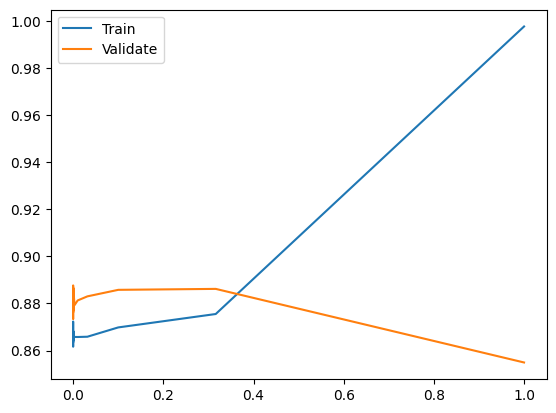

In [30]:
momentums = np.power(10.0,np.arange(-10,.5,.5))
train_scores = []
valid_scores = []

for momentum in momentums:
    mlp = MLPClassifier(solver='sgd',momentum=momentum)
    mlp.fit(X_train,y_train)

    train_scores.append(roc_auc_score(y_train, mlp.predict_proba(X_train), multi_class = "ovr", average = "micro"))
    valid_scores.append(roc_auc_score(y_valid, mlp.predict_proba(X_valid), multi_class = "ovr", average = "micro"))

fig,ax = plt.subplots()
ax.plot(momentums,train_scores,label='Train')
ax.plot(momentums,valid_scores,label='Validate')
ax.legend()
momentum = max(zip(momentums,valid_scores),key=lambda x: x[1])[0]
momentum

c:\Users\kyi\OneDrive - American Institutes for Research in the Behavioral Sciences\Documents\GitHub\ml-project\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kyi\OneDrive - American Institutes for Research in the Behavioral Sciences\Documents\GitHub\ml-project\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kyi\OneDrive - American Institutes for Research in the Behavioral Sciences\Documents\GitHub\ml-project\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kyi\OneDrive - A

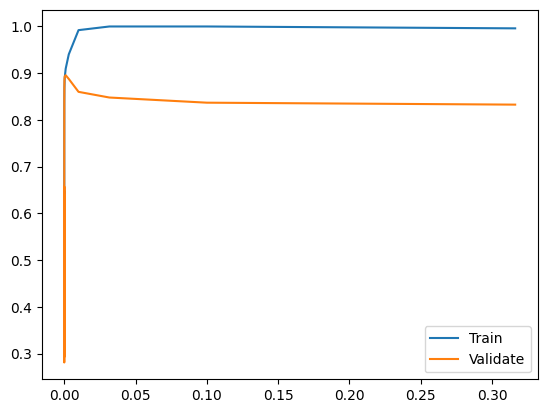

In [24]:
learning_rates = np.power(10.0,np.arange(-10,0,.5))
train_scores = []
valid_scores = []

for rate in learning_rates:
    mlp = MLPClassifier(solver='sgd',learning_rate_init=rate)
    mlp.fit(X_train,y_train)

    train_scores.append(roc_auc_score(y_train, mlp.predict_proba(X_train), multi_class = "ovr", average = "micro"))
    valid_scores.append(roc_auc_score(y_valid, mlp.predict_proba(X_valid), multi_class = "ovr", average = "micro"))

fig,ax = plt.subplots()
ax.plot(learning_rates,train_scores,label='Train')
ax.plot(learning_rates,valid_scores,label='Validate')
ax.legend()
rate = max(zip(learning_rates,valid_scores),key=lambda x: x[1])[0]
rate

## Tuning: Ensemble

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [26]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` paramete

In [27]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` paramete

9


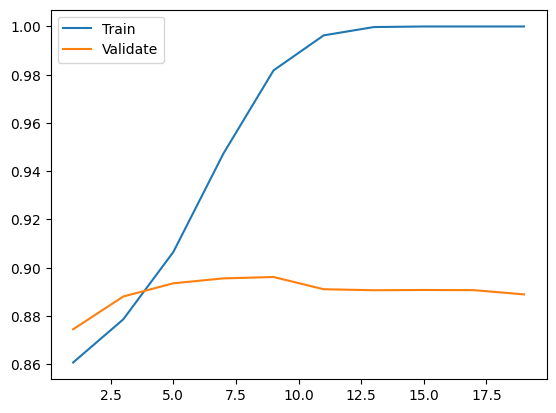

In [28]:
depths = np.arange(1,20,2)
train_scores = []
valid_scores = []

for depth in depths:
    clf = RandomForestClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)

    train_scores.append(roc_auc_score(y_train, clf.predict_proba(X_train), multi_class = "ovr", average = "micro"))
    valid_scores.append(roc_auc_score(y_valid, clf.predict_proba(X_valid), multi_class = "ovr", average = "micro"))

fig,ax = plt.subplots()
ax.plot(depths,train_scores,label='Train')
ax.plot(depths,valid_scores,label='Validate')
ax.legend()
depth = max(zip(depths,valid_scores),key=lambda x: x[1])[0]
print(depth)

## Score

In [70]:
mlp = MLPClassifier(solver='sgd',alpha=alpha,hidden_layer_sizes=tuple(layers),learning_rate_init=rate,momentum=momentum)
mlp.fit(X_train,y_train)
auc = roc_auc_score(y_test, mlp.predict_proba(X_test), multi_class = "ovr", average = "micro")
print(auc)

# fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(14, 7))
# plt.bar(mlp.feature_names_in_,mlp.feature_importances_)
# ax.tick_params(axis='x', labelsize=10, labelrotation=90)

0.8846090534979424


c:\Users\kyi\OneDrive - American Institutes for Research in the Behavioral Sciences\Documents\GitHub\ml-project\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [81]:
print(Counter(mlp.predict(X_test)))
Counter(y_test)

Counter({4.0: 84, 2.0: 6})


Counter({4.0: 60, 3.0: 16, 2.0: 10, 1.0: 4})

0.8711522633744855


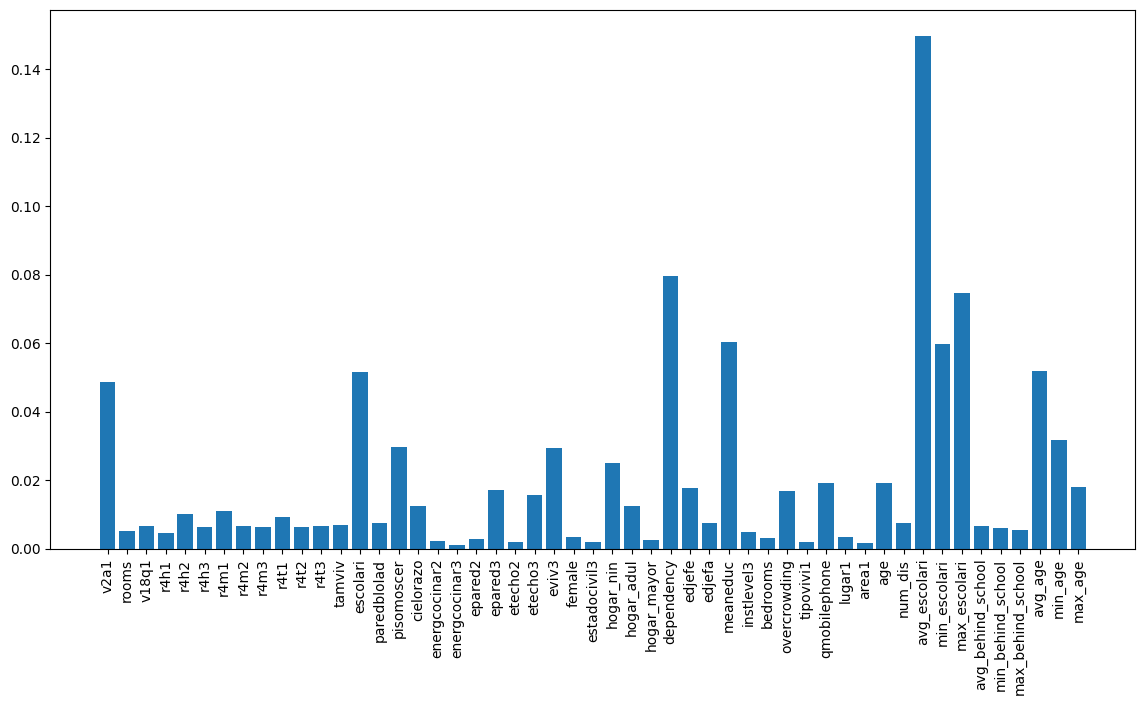

In [ ]:
clf = RandomForestClassifier(max_depth=depth, random_state=0)
clf.fit(X_train, y_train)
auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class = "ovr", average = "micro")
print(auc)

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(14, 7))
plt.bar(clf.feature_names_in_,clf.feature_importances_)
ax.tick_params(axis='x', labelsize=10, labelrotation=90)